In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
train_path ='ANNTEST/train'

In [3]:
valid_path = 'ANNTEST/valid'

In [4]:
test_path = 'ANNTEST/test'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, classes=['dog','cat'],batch_size=100)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, classes=['dog','cat'],batch_size=20)
test_batches = ImageDataGenerator().flow_from_directory(test_path, classes=['dog','cat'],batch_size=29)

Found 24000 images belonging to 2 classes.
Found 710 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


In [6]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [7]:
imgs, labels = next(train_batches)

c:\users\harshit\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


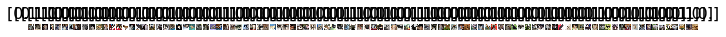

In [8]:
plots(imgs,titles=labels)

In [9]:
#Creating A CNN

In [10]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(256,256,3)),Flatten(),Dense(2, activation='softmax'),
])

In [18]:
model.compile(Adam(lr=.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit_generator(train_batches, steps_per_epoch=2,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 10s - loss: 12399.3878 - accuracy: 0.4850 - val_loss: 24988.9082 - val_accuracy: 0.5375
Epoch 2/5
 - 7s - loss: 17842.2275 - accuracy: 0.5300 - val_loss: 2106.4077 - val_accuracy: 0.5000
Epoch 3/5
 - 8s - loss: 8185.7615 - accuracy: 0.4450 - val_loss: 17640.8398 - val_accuracy: 0.5500
Epoch 4/5
 - 8s - loss: 18075.3066 - accuracy: 0.4800 - val_loss: 18650.6367 - val_accuracy: 0.4625
Epoch 5/5
 - 8s - loss: 11458.7881 - accuracy: 0.4550 - val_loss: 2557.8867 - val_accuracy: 0.4625


c:\users\harshit\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


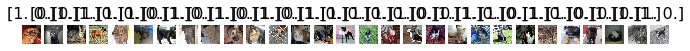

In [20]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [21]:
test_labels = test_labels[:,0]

In [22]:
test_labels

array([1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.], dtype=float32)

In [23]:
predictions = model.predict_generator(test_batches, steps=10,verbose=0)

In [24]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.